In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# from google.colab.patches import cv2_imshow
import urllib.request
from time import perf_counter


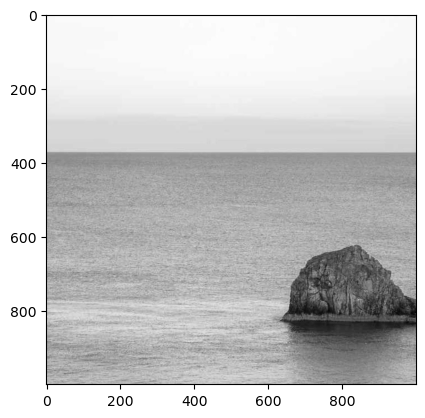

In [28]:
req = urllib.request.urlopen('https://picsum.photos/1000/1000.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr,-1)
gray = gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)
plt.imshow(gray, cmap="gray")

In [29]:
T_id = np.eye(3,3, dtype=int)

T_scale = np.array(
    [[1.5, 0, 0], 
     [0, 1.5, 0], 
     [0, 0, 1]])

T_traslate = np.array(
    [[1, 0, 20], 
     [0, 1, 20], 
     [0, 0, 1]])

T_rotate = np.array([
    [0.951057, -0.309017, 0], 
    [0.309017, 0.951057, 0], 
    [0, 0, 1]])

T_shear = np.array([
     [1, 0.25 ,0], 
     [0, 1, 0], 
     [0, 0, 1]
])

T_Afin = T_scale @ T_rotate @ T_traslate

# a) ciclos, tomando como referencia la imagen origen


In [30]:
def affineTransform(img, tMatrix):
  #print(T)
  Nr = img.shape[0]
  Nc = img.shape[1]
  img_transformed=np.zeros((Nr,Nc))
  for r in range(Nr):
    for c in range(Nc):
      cn = int(tMatrix[0,0]*c + tMatrix[0,1]*r + tMatrix[0,2])
      rn = int(tMatrix[1,0]*c + tMatrix[1,1]*r + tMatrix[1,2])
      if (rn>=0 and cn>=0 and rn<Nr and cn<Nc):
        img_transformed[rn,cn]=img[r,c]
  return img_transformed

In [31]:
imgIdentiy = affineTransform(gray, T_scale)
imgTranslate = affineTransform(gray, T_traslate)
imgRotate = affineTransform(gray, T_rotate)
imgShear = affineTransform(gray, T_shear)


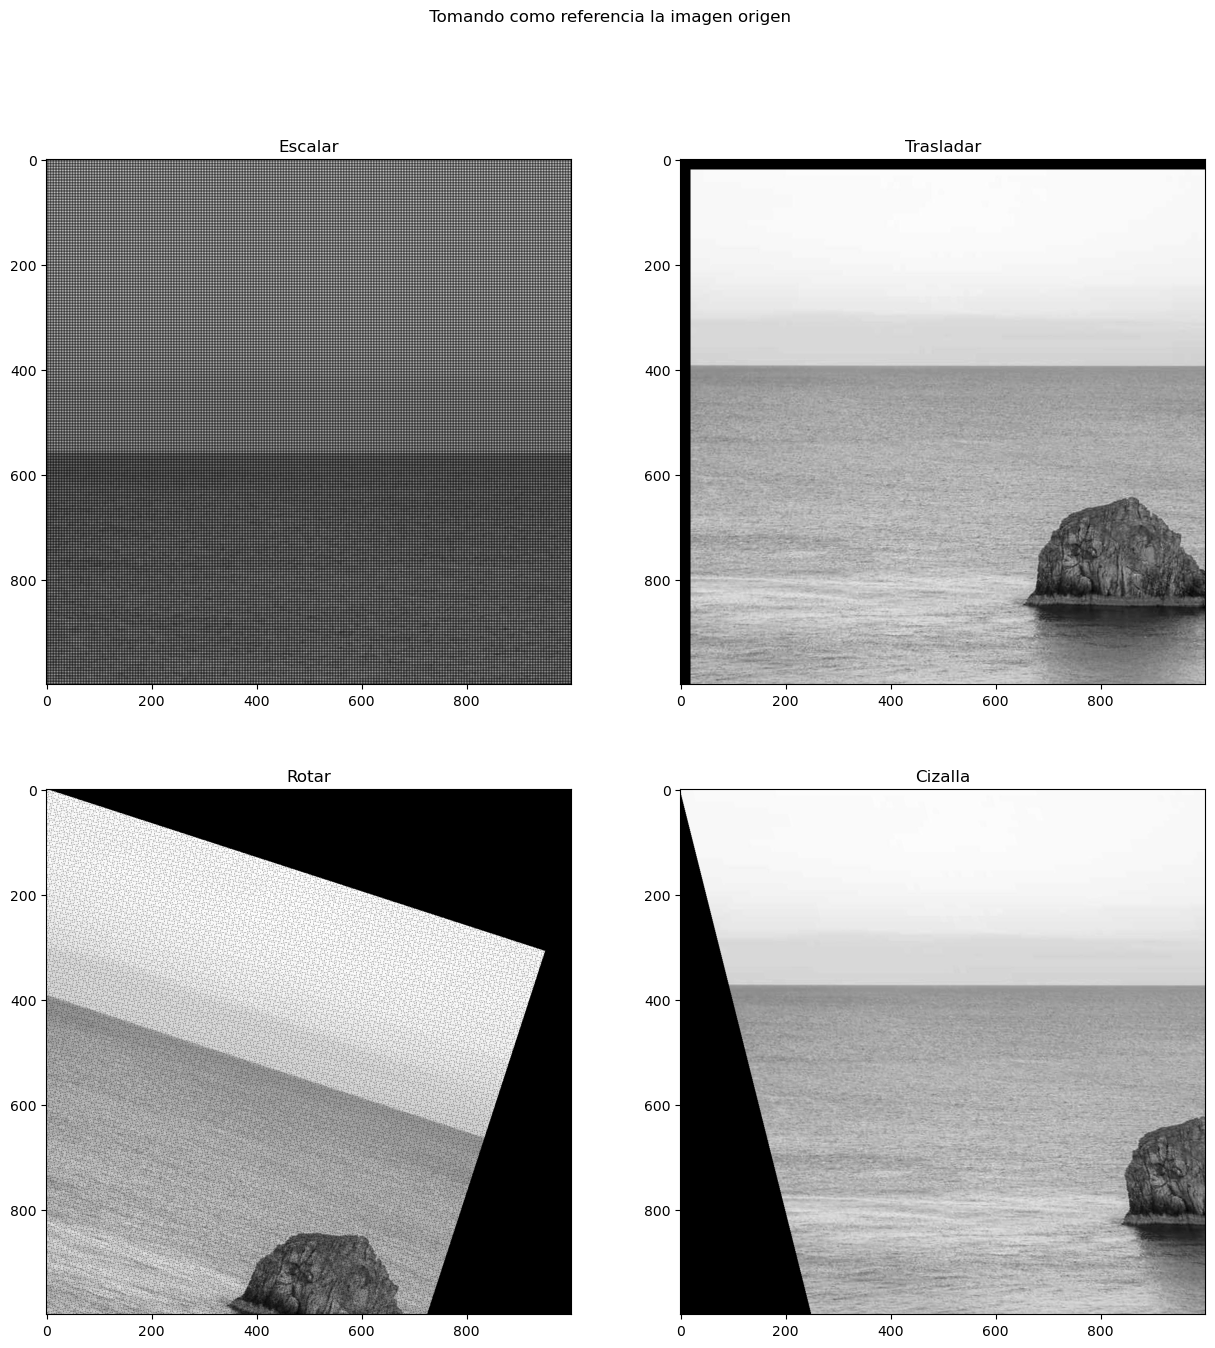

In [32]:

fig, ax = plt.subplots(2, 2, figsize=(15,15))
plt.suptitle(" Tomando como referencia la imagen origen")
# create subplots
ax[0, 0].set_title('Escalar')
ax[0, 0].imshow(imgIdentiy, cmap="gray")

ax[0, 1].set_title('Trasladar')
ax[0, 1].imshow(imgTranslate, cmap="gray")

ax[1, 0].set_title('Rotar')
ax[1, 0].imshow(imgRotate, cmap="gray")

ax[1, 1].set_title('Cizalla')
ax[1, 1].imshow(imgShear, cmap="gray")
# display the plot
plt.show()



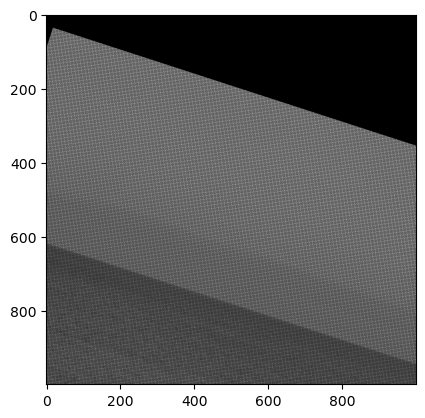

In [33]:
imAfin = affineTransform(gray, T_Afin)
plt.imshow(imAfin, cmap='gray')
# cv2_imshow(imAfin)

# b) ciclos, tomando como referencia la imagen destino

In [34]:
def affineTransformInv(img, tMatrix):
  tMatrix = np.linalg.inv(tMatrix)
  #print(T)
  Nr = img.shape[0]
  Nc = img.shape[1]
  img_transformed=np.zeros((Nr,Nc))
  for r in range(Nr):
    for c in range(Nc):
      cn = int(tMatrix[0,0]*c + tMatrix[0,1]*r + tMatrix[0,2])
      rn = int(tMatrix[1,0]*c + tMatrix[1,1]*r + tMatrix[1,2])
      if (rn>=0 and cn>=0 and rn<Nr and cn<Nc):
        img_transformed[r,c]=img[rn,cn]
  return img_transformed

In [35]:
imgIdentiy = affineTransformInv(gray, T_scale)
imgTranslate = affineTransformInv(gray, T_traslate)
imgRotate = affineTransformInv(gray, T_rotate)
imgShear = affineTransformInv(gray, T_shear)

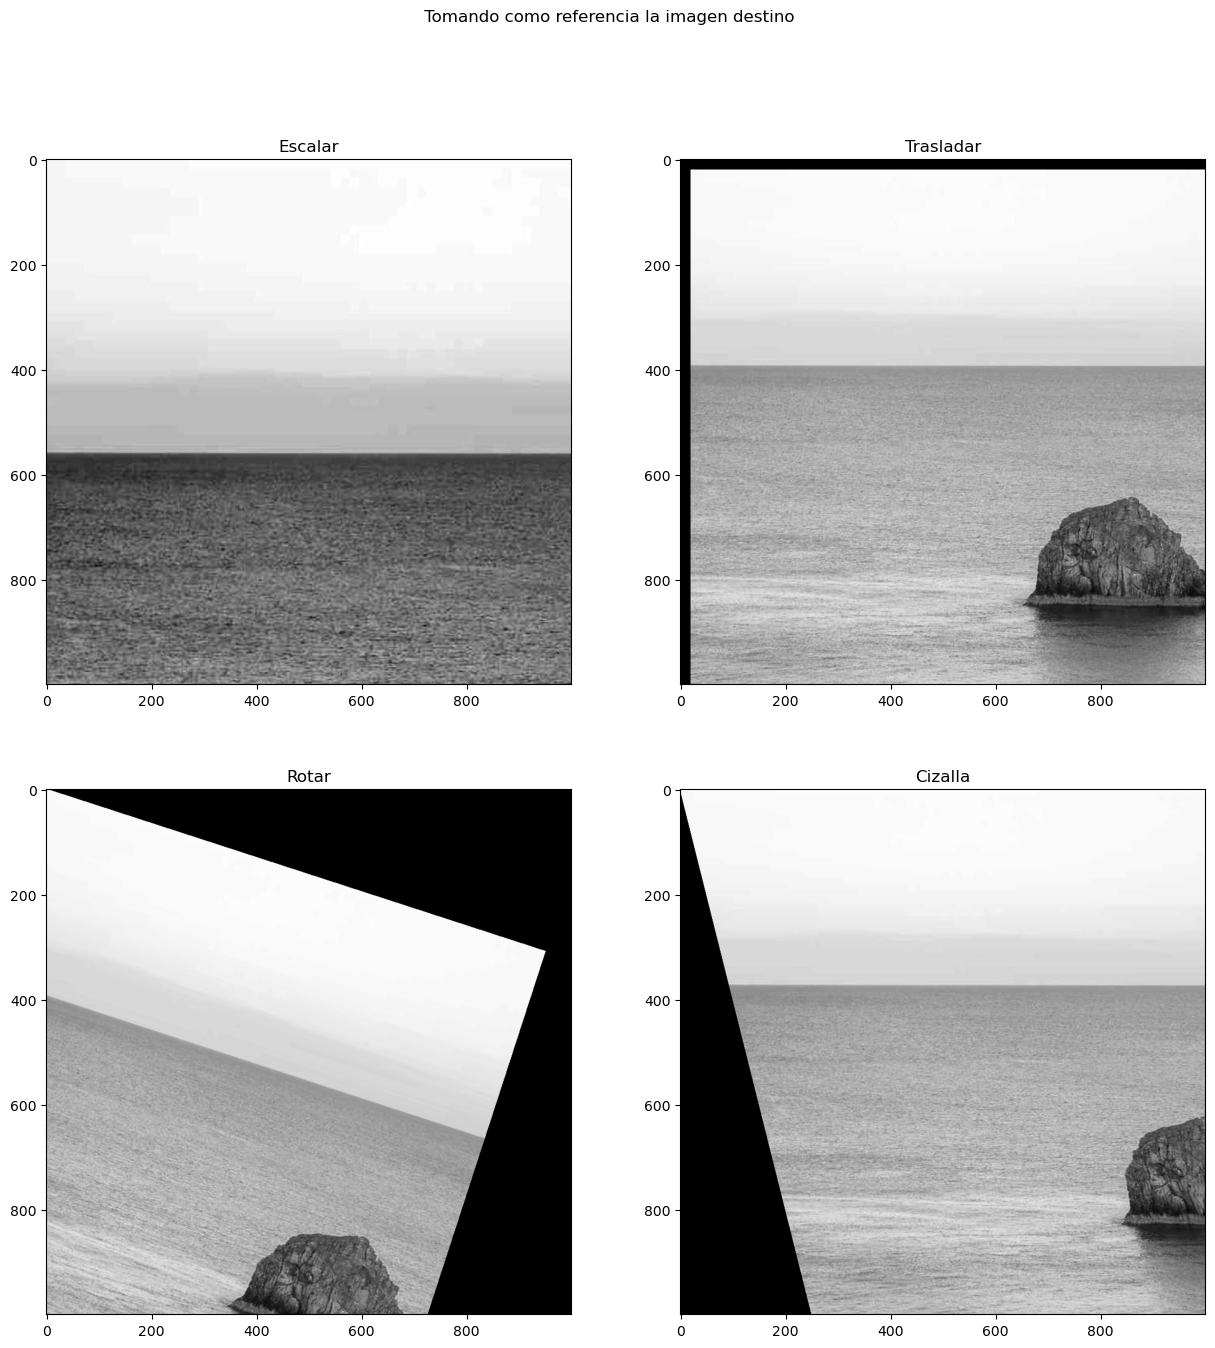

In [36]:

fig, ax = plt.subplots(2, 2, figsize=(15,15))
plt.suptitle(" Tomando como referencia la imagen destino")
# create subplots
ax[0, 0].set_title('Escalar')
ax[0, 0].imshow(imgIdentiy, cmap="gray")

ax[0, 1].set_title('Trasladar')
ax[0, 1].imshow(imgTranslate, cmap="gray")

ax[1, 0].set_title('Rotar')
ax[1, 0].imshow(imgRotate, cmap="gray")

ax[1, 1].set_title('Cizalla')
ax[1, 1].imshow(imgShear, cmap="gray")
# display the plot
plt.show()


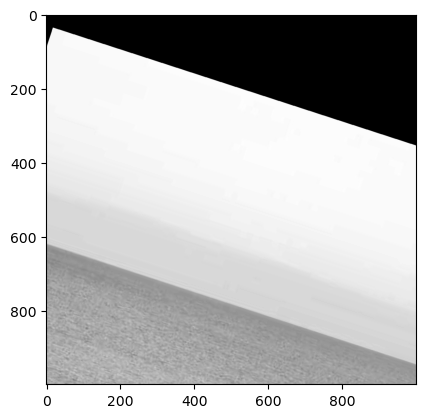

In [37]:
imAfin = affineTransformInv(gray, T_Afin)
plt.imshow(imAfin, cmap="gray")
# cv2_imshow(imAfin)

#c) List Comprehension

In [38]:
def operaciones(img, tMatrix, c,r, Nc, Nr):
  #print(tMatrix)
  cn = int(tMatrix[0,0]*c + tMatrix[0,1]*r + tMatrix[0,2])
  rn = int(tMatrix[1,0]*c + tMatrix[1,1]*r + tMatrix[1,2])
  #print(cn,rn)
  if (rn>=0 and cn>=0 and rn<Nr and cn<Nc):
    #print(img[rn,cn])
    return img[rn,cn]
  else:
    return 0 

def affineTransformInvLC(img, tMatrix):
  tMatrix = np.linalg.inv(tMatrix)
  #print(T)
  Nr = img.shape[0]
  Nc = img.shape[1]
  img_transformed=np.zeros((Nr,Nc))
  img_transformed = np.array([[operaciones(img, tMatrix, c, r, Nc, Nr) for c in range(Nc)] for r in range(Nr)])
  return img_transformed



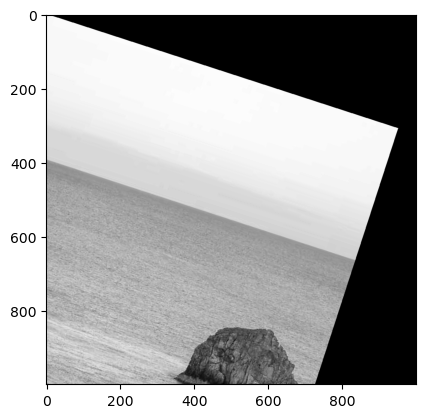

In [39]:
imAfin = affineTransformInvLC(gray, T_rotate)
plt.imshow(imAfin, cmap='gray')
# cv2_imshow(imAfin)

# Interpolación bilineal


In [40]:
def affineTransformBilinear(img, tMatrix):
  tMatrix = np.linalg.inv(tMatrix)
  #print(T)
  Nr = img.shape[0]
  Nc = img.shape[1]
  img_transformed=np.zeros((Nr,Nc))
  img_transformed = np.array([[bilinear(img, tMatrix, c, r, Nc, Nr) for c in range(Nc)] for r in range(Nr)])
  return img_transformed

def bilinear(img, tMatrix, c, r, Nc, Nr):
  cn = tMatrix[0,0]*c + tMatrix[0,1]*r + tMatrix[0,2]
  rn = tMatrix[1,0]*c + tMatrix[1,1]*r + tMatrix[1,2]
  a = rn - int(rn)
  b = cn - int(cn)
  rn = int(rn)
  cn = int(cn)

  if rn < 0 or cn< 0 or rn > Nr - 2 or cn > Nc - 2:
    return 0
  if a == 0 and b == 0:
    return img[rn,cn]
  if rn == Nr - 1 and cn == Nc - 1:
    return img[rn,cn];
  if b == 0 or cn == Nc - 1:
    return (1 - a) * img[rn,cn] + a * img[rn + 1,cn]
  if a == 0 or rn == Nr - 1:
    return (1 - b) * img[rn,cn] + b * img[rn,cn + 1]
  y = (1 - a) * (1 - b) * img[rn,cn] + (1 - a) * b * img[rn,cn + 1] + a * (1 - b) * img[rn + 1,cn] + a * b * img[rn + 1, cn + 1]
  return y




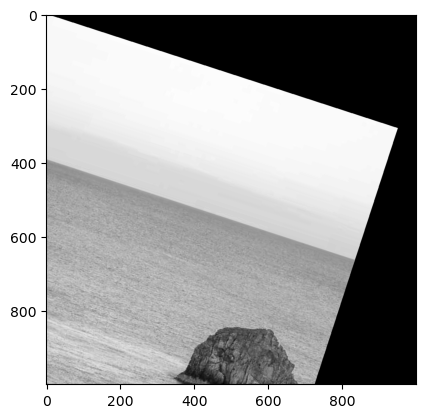

In [41]:
imgBilinear = affineTransformBilinear(gray, T_rotate)
plt.imshow(imgBilinear, cmap='gray')
# cv2_imshow(imgBilinear)

# OpenCV Warp image

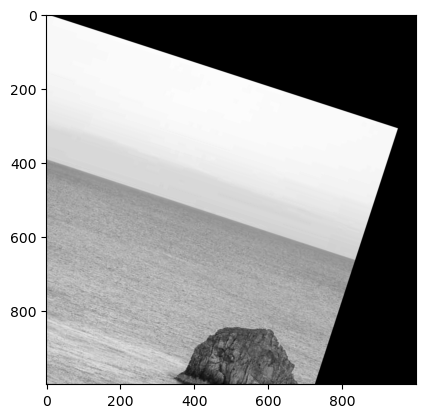

In [42]:
T_AfinCV = T_rotate.flatten()[:6].reshape(2,3)
img_transformed = cv2.warpAffine(gray, T_AfinCV, (1000, 1000))
plt.imshow(img_transformed, cmap='gray')
# cv2_imshow(img_transformed)


# Tiempos de Ejecución. 

| Implementación                 | Tiempo ejecución 1   | Tiempo ejecución 2   | Tiempo ejecución 3   | Promedio (s) |
|--------------------------------|----------------------|----------------------|----------------------|--------------|
| Ciclos imagen origen           | 2.4516576310015807   | 3.0089077500015264   | 2.4314553139993222   | 2.63067357   |
| Ciclos imagen destino          | 2.7469042080010695   | 3.4526408159981656   | 2.6518009920000623   | 2.95044867   |
| List Comprehension inv destino | 2.7221533129995805   | 2.562145726999006    | 3.2884415199987416   | 2.85758019   |
| List Comprehension Bilinear    | 7.294024482998793    | 5.954256094999437    | 6.523528899000667    | 6.59060317   |
| Función OpenCV                 | 0.006239932001335546 | 0.014075401999434689 | 0.006726944997353712 | 0.009014093  |

In [43]:
tick = perf_counter()
imAfin = affineTransform(gray, T_Afin)
tock = perf_counter()
print("--"*3 +f" Transformación Afin IO: {tock-tick} " +"--"*3)


tick = perf_counter()
imAfin = affineTransformInv(gray, T_Afin)
tock = perf_counter()
print("--"*3 +f" Transformación Afin ID: {tock-tick} " +"--"*3)

tick = perf_counter()
imAfin = affineTransformInvLC(gray, T_Afin)
tock = perf_counter()
print("--"*3 +f" Transformación Afin LC: {tock-tick} " +"--"*3)

tick = perf_counter()
imgBilinear = affineTransformBilinear(gray, T_Afin)
tock = perf_counter()
print("--"*3 +f" Transformación Afin LCBL: {tock-tick} " +"--"*3)

tick = perf_counter()
img_transformed = cv2.warpAffine(gray, T_AfinCV, (1000, 1000))
tock = perf_counter()
print("--"*3 +f" Transformación Afin OpenCV: {tock-tick} " +"--"*3)

------ Transformación Afin IO: 1.126526832998934 ------
------ Transformación Afin ID: 1.2385161659985897 ------
------ Transformación Afin LC: 1.2015047910026624 ------
------ Transformación Afin LCBL: 2.6542088329988474 ------
------ Transformación Afin OpenCV: 0.0008922909983084537 ------
